# 1. What is a Decision Tree?

- It is a tree structure that represents possible decision paths and an outcome for each path
- Commonly used for <u>Classification and Regression tasks </u> both

## (a) Example: 
- Consider a very idiosyncratic(not very comprehensive) "Guess the Animal" decision tree:
  > “I am thinking of an animal.”  
  > “Does it have more than five legs?”  
  > “No.”  
  > “Is it delicious?”  
  > “No.”  
  > “Does it appear on the back of the Australian five-cent coin?”  
  > “Yes.”  
  > “Is it an echidna?”  
  > “Yes, it is!”  

- This corresponds to the path:
  > “Not more than 5 legs” → “Not delicious” → “On the 5-cent coin” → “Echidna!”

## (b) Key Features of Decision Trees:
1. Easy to understand and explain. Very clear thus excellent for communicating with non-experts. (thus Interpretable)

2. They can manage both numeric and categorical data. For example, "number of legs" is numeric, while "delicious/not delicious" is categorical. (thus Flexible)

3. They can classify data even if some attributes are missing, offering flexibility in data processing.

## (c) Challenges with Decision Trees
1. Finding an optimal decision tree for a dataset is computationally difficult. Thus, we will focus on good-enough one, not optimal.

2. It is very easy (and very bad) to build decision trees that are overfitted to the training data, and that don’t generalize well to unseen data.
   > Methods like pruning and limiting tree depth help mitigate this risk.

## (d) Types of Decision Trees
1. Classification Trees: These trees produce categorical outputs. For example, deciding whether an animal is an echidna or a platypus.

2. Regression Trees: These trees predict numeric outputs, such as estimating the price of a house based on various features.

We will Focus on Classification Trees, with an emphasis on binary outputs, such as:

- "Should I hire this candidate?"
- "Should I show this website visitor advertisement A or B?"
- "Will eating this food from the office fridge make me sick?"

## (e) ID3 Algorithm
- The chapter introduces the ID3 algorithm for learning a decision tree from labeled data.
- This algorithm uses entropy and information gain to determine the best questions to ask at each node, leading to a structured and efficient decision tree

## (f) DT Nomenclature
![image](DT_fig.png).


# 2. Entropy

> - Entropy is a measure of <u>uncertainty or disorder in a dataset </u>   
> - It helps <u>determine the best questions</u> to ask to split the data in a way  <u>that reduces uncertainty</u>

## What's a Best Question?
> - Decision trees are structures that represent a series of decision points
> - With each Decision point/Question splitting the data into smaller subsets
> - At each stage, some possibilities are eliminated, while others remain
> - To build an effective decision tree, we need to decide - 'questions' and 'their order'
> -  Ideally, we want questions that maximize information gain and reduce uncertainty about the final outcome  

Choose best question:
> 1. High Information Gain questions: If a question perfectly separates data into distinct classes (Good question)
> 2. Low Information Gain: It it doesn't provide much new information or doesn't help distinguish between classes is likely not a good choice

## Finding Entropy H(S)
1. Dataset: $S = [(input, label)]$
2. Classes: labels $C_1, C_2, ... C_n$
3. Mathematically Entropy is,
   $$ H(S) = -p_1.log_2(p_1) - ... - p_n . log_2(p_n)$$
   - $p_i$ is proportion of data labled as $C_i$
   - with the (standard) convention that 0 log 0 = 0.
5. (Entropy) $\alpha$ (Uncertainity)
   > - Low Entropy: If all data points <u>belong to a single class</u>, there's no uncertainty, leading to low entropy.
   > - High Entropy: If data points are <u>evenly spread across multiple classes</u>, there's high uncertainty, resulting
   >   in high entropy.
6. $- p_n . log_2(p_n)$ is always positive because $0<p_i<1$
7. Entropy H(S) can be greater than 1. Depends on number of classes and distribution of class probabilities
   > - For two classes we will see max Entropy less than 1  
   > - For more than two classes it exceeds 1
9. Let's plot  $- p . log_2(p)$ vs $p$ and see:

## Plotting Entropy

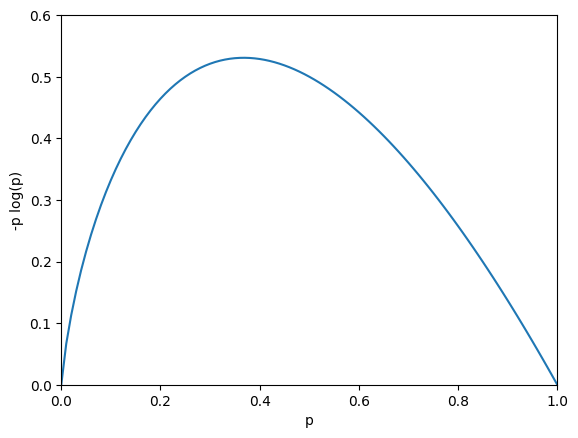

In [33]:
from matplotlib import pyplot as plt
import math

xs = [x/100 for x in range(1,101)] # class probabilities
ys = [(-p * math.log2(p)) for p in xs 
      if p >0]
xs = [0] + xs 
ys = [0] + ys

plt.xlim(0, 1)
plt.ylim(0, 0.6)
plt.xlabel('p')
plt.ylabel('-p log(p)')
plt.plot(xs, ys)
plt.show()


## Code for finding Entropy of dataset
- To find data Entropy we will follow these steps:
> 1. Define common entropy function of a List of possibility ($p$)
> 2. Find probability ($p$) of each class from dataset
> 4. Find entropy of full dataset using 1.

In [34]:
from typing import List
import math

def entropy(class_probabilities: List[float]) -> float:
    """
    Given a list of class probabilities, compute the entropy
    """
    return sum(-p * math.log2(p) 
               for p in class_probabilities
               if p > 0
              )

assert entropy([0.5, 0.5]) == 1  # evenly distributed data among two classes has high entropy/uncertainity
assert entropy([1, 0]) == 0      # one class has all data thus entropy is minimum
assert 0.81 < entropy([0.25, 0.75]) < 0.82 # less entropy than evenly distributed dataset amond two classes

We find:
> 1. More evenly the data is distributed : More is uncertainity/Entropy
> 2. More certain the data is in one class : Less Entropy

Now, Let's apply to our data format,   
$$dataset = [(input, label)]$$ 
$$ S = List[label] = [S_1, S_2,..., S_n]$$

In [35]:
from typing import Any
from collections import Counter

def class_probabilities(labels: List[Any]) -> List[float]:
    """ 
    Probability of each class in list of label
    """
    total_counts = len(labels)
    return[counts/total_counts 
           for counts in Counter(labels).values()]

def data_entropy(labels: List[Any]) -> float:
    return entropy(class_probabilities(labels))

assert data_entropy(['a']) == 0   # Only one label means highly certain dataset
assert data_entropy([True, False]) == 1 # Two evenly distributed dataset means highly uncertain dataset
assert data_entropy([3, 4, 4, 4]) == entropy([0.25, 0.75]) # Medium entropy

# 3. Entropy of a Partition

- Partitioning is the process of <u>splitting a dataset into subsets</u>
- In decision trees, <u>each question creates a new partition</u>, resulting in subsets of the data
- Our Goal is to find questions that <u>create subsets with low entropy</u>
- Means they lead to a more definitive answer or prediction

## (a) Calculate Partition Entropy
$$
H = q_1 \cdot H(S_1) + \ldots + q_m \cdot H(S_m)
$$

Where:

- $q_i$ is the proportion of the data in subset $S_i$ i.e. $$q_i = \frac{len(subset)}{len(dataset)}$$
- $H(S_i)$ is the entropy of subset $S_i$.

- If the partition is good
> - The weighted sum of the partition entropy should be less than the total entropy of dataset
> - Indicating that the partition has reduced uncertainty in the data
> - This reduction in uncertainty is what drives the decision-making process in a decision tree

- If the weighted sum of the partition entropy were the same as the total entropy
> - It would mean that the partition did not reduce uncertainty
> - Indicating that the split was ineffective in distinguishing between classes
> - This situation would suggest poor partitioning, where the original uncertainty remains after the split

## (b) Overfitting in DT with partitioning

- When an attribute has a large number of unique values partitioning by that attribute will lead to subsets with very low entropy (high certainty)
- Model will rely too heavily on specific details in the training set that are not broadly applicable

Example: Social Security Number (SSN)
> - Consider a scenario where you're building a decision tree for a bank to predict which customers are likely to default on their mortgages
> - If the dataset includes each customer's Social Security number (SSN), partitioning on SSN would create one-person subsets, each with zero entropy
> - This means the partition is highly specific to the training data and doesn't generalize to other datasets

- Therefore, we should probably try to avoid (or bucket) attributes with large numbers of possible values when creating decision trees.


## (c) Code for Partition Entropy

In [36]:
def partition_entropy(subsets: List[List[Any]]) -> float:
    """
    Returns the entropy from this partition of data into subsets
    """
    total_count = sum(len(subset) for subset in subsets)
    return sum(data_entropy(subset) * len(subset) / total_count for subset in subsets)

# 4. Creating a Decision Tree

- We will build a decision tree to <u>determine if candidates interviewed well based on various attributes</u>.
- The key to creating an effective tree is - choose the best questions to split the data, minimizing uncertainty (entropy) at each step

## (a) Candidate Data attributes:
> - Attribute 1: Level: Senior, Mid, Junior 
> - Attribute 2: Preferred Language: Java, Python, R
> - Attribute 3: Tweets: Whether they are active on Twitter
> - Attribute 4: PhD: Whether they hold a PhD
> - Label: Did Well: Whether they interviewed well (target variable)



In [37]:
# Define a class for attributes
from typing import Optional, NamedTuple

class Candidate(NamedTuple):
    level:str
    lang: str
    tweets: bool
    phd: bool
    did_well: Optional[bool] = None # means it can be either boolean or missing/none

# level lang tweets phd did_well
inputs = [Candidate('Senior', 'Java', False, False, False),
Candidate('Senior', 'Java', False, True, False),
Candidate('Mid', 'Python', False, False, True),
Candidate('Junior', 'Python', False, False, True),
Candidate('Junior', 'R', True, False, True),
Candidate('Junior', 'R', True, True, False),
Candidate('Mid', 'R', True, True, True),
Candidate('Senior', 'Python', False, False, False),
Candidate('Senior', 'R', True, False, True),
Candidate('Junior', 'Python', True, False, True),
Candidate('Senior', 'Python', True, True, True),
Candidate('Mid', 'Python', False, True, True),
Candidate('Mid', 'Java', True, False, True),
Candidate('Junior', 'Python', False, True, False)
]

## (b) ID3 Algorithm - Greedy algorithm
1. Calculate entropy of full dataset on label did_well
   > - If all instances have the same label True/False, the entropy will be 0
   > - And create a leaf node (end node) that predicts the label and stop.

2. Check if there are no more attributes to split on
   > - Create leaf node with most common value for did_well label i.e. True or False and stop.

3. Now, if attributes are there to be splitted
   > - Partition data based on each attribute
   > - Calculate partition entropy of each attribute on label
   > - Choose the attribute with lowest Entropy  
   >   As it will have lowest uncertainty and be most useful split.
   > - Name the decision node of chosen attribute

4. Recursively build the tree
   > - Apply same ID3 algorithm to each subset again


- This is what’s known as a “greedy” algorithm because,
> - At each step, it chooses the most immediately best option.
> - Given a dataset, there may be a better tree with a worse-looking first move.
> - If so, this algorithm won’t find it.
> - Nonetheless, it is relatively easy to understand and implement, which makes it a good place to begin exploring decision trees.
   

In [38]:
from typing import Dict, TypeVar
from collections import defaultdict
T = TypeVar('T') # generic type for inputs
def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
    """
    Partition the inputs into lists based on the specified attribute.
    """
    partitions: Dict[Any, List[T]] = defaultdict(list)
    for input in inputs:
        key = getattr(input, attribute) # value of the specified attribute
        partitions[key].append(input) # add input to the correct partition
    return partitions

#let's see how it will work
print(f"partition by Level: {partition_by(inputs, 'level')}")
print(f"partition by language: {partition_by(inputs, 'lang')}")
print(f"partition by tweets: {partition_by(inputs, 'tweets')}")
print(f"partition by phd: {partition_by(inputs, 'phd')}")

partition by Level: defaultdict(<class 'list'>, {'Senior': [Candidate(level='Senior', lang='Java', tweets=False, phd=False, did_well=False), Candidate(level='Senior', lang='Java', tweets=False, phd=True, did_well=False), Candidate(level='Senior', lang='Python', tweets=False, phd=False, did_well=False), Candidate(level='Senior', lang='R', tweets=True, phd=False, did_well=True), Candidate(level='Senior', lang='Python', tweets=True, phd=True, did_well=True)], 'Mid': [Candidate(level='Mid', lang='Python', tweets=False, phd=False, did_well=True), Candidate(level='Mid', lang='R', tweets=True, phd=True, did_well=True), Candidate(level='Mid', lang='Python', tweets=False, phd=True, did_well=True), Candidate(level='Mid', lang='Java', tweets=True, phd=False, did_well=True)], 'Junior': [Candidate(level='Junior', lang='Python', tweets=False, phd=False, did_well=True), Candidate(level='Junior', lang='R', tweets=True, phd=False, did_well=True), Candidate(level='Junior', lang='R', tweets=True, phd=Tru

In [39]:
def partition_entropy_by(inputs: List[Any],
                         attribute: str,
                         label_attribute: str) -> float:
    """
    Compute the partition entropy corresponding to the given partition
    """
    # partitions consist of our inputs
    partitions: dict[Any, List[T]] = partition_by(inputs, attribute)  # get all dataset partitioned under 'attribute' 
    
    # but partition_entropy needs just the class labels 
    labels = [[getattr(input, label_attribute) for input in partition]
              for partition in partitions.values()]
    return partition_entropy(labels)

In [40]:
partition_entropy_by(inputs, attribute='level', label_attribute='did_well')

0.6935361388961919

In [41]:
# Find minimum entropy partition 

for attribute in ['level', 'lang', 'tweets', 'phd']:
    print(f"Partition entropy for {attribute} {partition_entropy_by(inputs, attribute, label_attribute='did_well')}")

Partition entropy for level 0.6935361388961919
Partition entropy for lang 0.8601317128547441
Partition entropy for tweets 0.7884504573082896
Partition entropy for phd 0.8921589282623617


- 'Level' partition has minimum entropy
- Make subtree for each possible 'level'
- For every 'Mid' candidate
> - did_well = True
- For 'Senior' candidate ->
> - Some 'True' some 'False'
> - So, we need to find subtree under it again
> - Find minimum entropy partition among 'lang', 'tweets', 'phd'

- So, our next split under 'Senior' will be 'tweets'
  > - All Senior-level who tweet did well.

- We will do same for 'Junior' Candidates



# 5. Putting it all together

- We will build the decision tree using ID3 algorithm explained above
- Then classify data with built tree

## (a) Decision tree representation

The decision tree can be represented as a combination of:

> 1. Leaf Nodes: Nodes that predict a single value or class.
> 2. Split Nodes: Nodes that contain an attribute to split on, with subtrees for specific values of that attribute, and optionally a default value for unknown or unexpected attribute values



In [42]:
# Representation of nodes
from typing import NamedTuple, Any, Union

class Leaf(NamedTuple):
    value: Any

class Split(NamedTuple):
    attribute: str
    subtrees: dict
    default_value: Any = None  # default if unknown value
    
DecisionTree = Union[Leaf, Split]

## (b) Building DT using ID3

1. Unique Label: If all data points have same label, create 'leaf' node of that label, then stop.
2. No Split Attribute: No more attributes present for splitting, create 'leaf' node that predict the most common label.
3. Partition by Best Attribute: None of condition 1/2 applies then partition by least entropy attribute and create split node.
4. Recursion: Apply the ID3 algorithm recursively to each partitioned subset, using the remaining attributes.

In [60]:
from collections import Counter

def build_tree_id3(inputs: List[Any],
                   split_attributes: List[str],
                   target_attribute: str) -> DecisionTree:

    # 1. Unique Label
    label_counts = Counter(getattr(input, target_attribute) for input in inputs)
    most_common_label = label_counts.most_common(1)[0][0]

    # If all labels are same, create a leaf node
    if len(label_counts) == 1:
        return Leaf(most_common_label)

    # 2. If no more split attribute, create a leaf node with most common label
    if not split_attributes:
        return Leaf(most_common_label)

    # 3. Partition by attribute 
    def split_entropy(attribute: str) -> float:
        return partition_entropy_by(inputs, attribute, target_attribute)

    best_attribute = min(split_attributes, key = split_entropy)
    partitions = partition_by(inputs, best_attribute)

    new_attributes = [a for a in split_attributes if a != best_attribute]

    # 4. Recursively build subtrees
    subtrees = {
        attribute_value: build_tree_id3(subset, new_attributes, target_attribute)
        for attribute_value, subset in partitions.items()
    }
    # Create split node with best attribute and its subtrees
    return Split(best_attribute, subtrees, default_value=most_common_label)          

## (c) Using the Decision Tree for Classification
- To classify an input using the decision tree, the algorithm follows the tree's structure, moving through the decision nodes until it reaches a leaf node.
  
- If an attribute is unknown, the algorithm uses the 'default_value' in the Split node.

In [61]:
def classify(tree: DecisionTree, input: Any) -> Any:
    """
    Classify the input using the given decision tree
    """
    if isinstance(tree, Leaf):
        return tree.value  # If it's a leaf node, return its value

    subtree_key = getattr(input, tree.attribute)
    
    if subtree_key not in tree.subtrees:  # Unknown value, use default
        return tree.default_value
    
    # Traverse the tree based on the attribute value
    subtree = tree.subtrees[subtree_key]
    return classify(subtree, input)  # Recursively classify


In [62]:
# Build the decision tree
tree = build_tree_id3(inputs, ['level', 'lang', 'tweets', 'phd'], 'did_well')

# Test the classification
print(classify(tree, Candidate("Junior", "Java", True, False)))  # Should predict True
print(classify(tree, Candidate("Junior", "Java", True, True)))   # Should predict False
print(classify(tree, Candidate("Intern", "Java", True, True)))   # Should predict True (default)

True
False
True


# Random Forest



- Problem with any model fit -  Overfitting
  
- DTs have the same problems, given how closely they fit to training data

**How to avoid Overfitting in DTs?**

- Using **Random Forest** technique
  > First, we build multiple trees from same data  
  > Second, we combine output of all trees :
  > - Regression problem - take average
  > - Classification problem - Vote

- How to make multiple trees from same data?
  > 1. Creating trees from bootstrapped data
  > 2. Instead of using best_attribute among List of all attributes, using random subset of attribute list and find best among them.

- Let's see how can we create multiple trees using second method:

## Ensemble learning
- The above method where we generate multiple random trees to get a balanced Decision Tree is actually an example of Emsemble learning.
- Here, we combine several weak learners (typically high-bias, low-variance models) in order to produce an overall strong model.